## 作業目標:

    1. 藉由固定的 dataset, 來驗證不同loss function
    2. Dataset 的特性跟我們選用的loss function 對accrancy 的影響
    
    
## 作業重點: 
    請分別選用 "MSE", "binary _crossentropy"
    查看Train/test accurancy and loss rate
    

### 資料準備

In [1]:
# 引用相關函式庫
from keras.datasets import cifar10
import numpy as np

np.random.seed(10)

Using TensorFlow backend.


In [2]:
# 取得 Dataset
(x_train_image, y_train_label),(x_test_image, y_test_label) = cifar10.load_data()

In [3]:
# 確認 cifar10 dataset 的資料維度
print('Train data： image',x_train_image.shape,' label',y_train_label.shape)
print('Test  data： image',x_test_image.shape,' label',y_test_label.shape)

Train data： image (50000, 32, 32, 3)  label (50000, 1)
Test  data： image (10000, 32, 32, 3)  label (10000, 1)


In [4]:
# 資料正規化
x_train_normalize = x_train_image.astype('float32')/255.0
x_test_normalize = x_test_image.astype('float32')/255.0

In [6]:
# 針對 Label 做 OneHot Encode
from keras.utils import np_utils

y_train_OneHot = np_utils.to_categorical(y_train_label)
y_test_OneHot = np_utils.to_categorical(y_test_label)

In [7]:
# 比對編碼後的 Label 維度變化
print('Train data：',y_train_OneHot.shape)
print('Test  data：',y_test_OneHot.shape)

Train data： (50000, 10)
Test  data： (10000, 10)


### 建立模型

In [8]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

# 宣告採用序列模型
model = Sequential()

W0927 14:44:13.944458  1964 deprecation_wrapper.py:119] From C:\Users\USER\AppData\Local\conda\conda\envs\env_for_tensorflow\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.



In [10]:
# 輸入層，使用卷積網路
model.add(Conv2D(filters=32,
                 kernel_size=(3, 3),
                 input_shape=(32, 32, 3),
                 activation='relu',
                 padding='same'))

model.add(Dropout(rate=0.25))

model.add(MaxPooling2D(pool_size=(2, 2)))

W0927 14:47:49.523123  1964 deprecation_wrapper.py:119] From C:\Users\USER\AppData\Local\conda\conda\envs\env_for_tensorflow\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0927 14:47:49.539113  1964 deprecation_wrapper.py:119] From C:\Users\USER\AppData\Local\conda\conda\envs\env_for_tensorflow\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0927 14:47:49.728995  1964 deprecation_wrapper.py:119] From C:\Users\USER\AppData\Local\conda\conda\envs\env_for_tensorflow\lib\site-packages\keras\backend\tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0927 14:47:49.766971  1964 deprecation.py:506] From C:\Users\USER\AppData\Local\conda\conda\envs\env_for_tensorflow\lib\site-packages\keras\backend\tensorflow_backend.py

In [11]:
# 隱藏層，使用一個卷積網路
model.add(Conv2D(filters=64,
                 kernel_size=(3, 3),
                 activation='relu',
                 padding='same'))

model.add(Dropout(rate=0.25))

model.add(MaxPooling2D(pool_size=(2, 2)))

In [12]:
# 建立神經網路(平坦層、隱藏層、輸出層)
model.add(Flatten())
model.add(Dropout(rate=0.25))

model.add(Dense(1024, activation='relu'))
model.add(Dropout(rate=0.25))

model.add(Dense(10, activation='softmax'))

In [13]:
# 檢查 model stack
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)              0         
__________

### 檢查之前是否有模型資訊

In [15]:
try: 
    model.load_weights('SaveModel/cifarCnnModel.h5')
    print('載入模型成功! 繼續訓練模型。')
except:
    print('載入模型失敗!開始訓練新模型。')

載入模型失敗!開始訓練新模型。


### 訓練模型  
    請分別選用 "MSE", "binary _crossentropy"
    查看Train/test accurancy and loss rate

In [18]:
# 模型編譯 binary_crossentropy
model.compile(loss='binary_crossentropy', optimizer='Adam',metrics=['accuracy'])

In [19]:
# 訓練模型 Train History 將訓練過程得到的數值存起來
train_history = model.fit(x_train_normalize, y_train_OneHot,
                          validation_split=0.25,
                          epochs=10,
                          batch_size=64,
                          verbose=1)

Train on 37500 samples, validate on 12500 samples
Epoch 1/10
37500/37500 [==============================] - 280s 7ms/step - loss: 0.1875 - acc: 0.9261 - val_loss: 0.1781 - val_acc: 0.9297
Epoch 2/10
37500/37500 [==============================] - 301s 8ms/step - loss: 0.1620 - acc: 0.9361 - val_loss: 0.1707 - val_acc: 0.9334
Epoch 3/10
37500/37500 [==============================] - 252s 7ms/step - loss: 0.1440 - acc: 0.9433 - val_loss: 0.1543 - val_acc: 0.9396
Epoch 4/10
37500/37500 [==============================] - 248s 7ms/step - loss: 0.1301 - acc: 0.9486 - val_loss: 0.1468 - val_acc: 0.9431
Epoch 5/10
37500/37500 [==============================] - 268s 7ms/step - loss: 0.1164 - acc: 0.9545 - val_loss: 0.1369 - val_acc: 0.9470
Epoch 6/10
37500/37500 [==============================] - 283s 8ms/step - loss: 0.1036 - acc: 0.9598 - val_loss: 0.1310 - val_acc: 0.9485
Epoch 7/10
37500/37500 [==============================] - 289s 8ms/step - loss: 0.0934 - acc: 0.9639 - val_loss: 0.1278 - 

In [20]:
import matplotlib.pyplot as plt

%matplotlib inline

# 定義繪圖函數
def show_train_history(train_acc, test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train_acc', 'val_acc'], loc='upper left')
    plt.show()

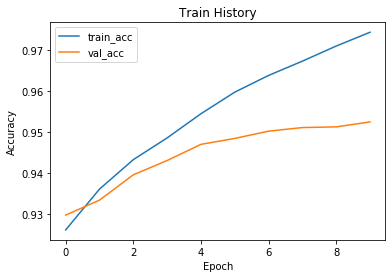

In [21]:
show_train_history('acc','val_acc')

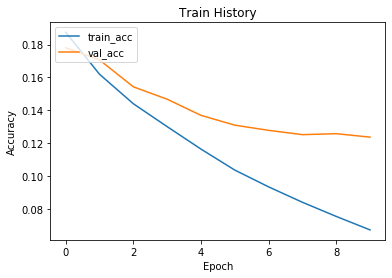

In [22]:
show_train_history('loss','val_loss')

### 估計模型準確率

In [23]:
scores = model.evaluate(x_test_normalize, y_test_OneHot)
print('Accuracy = ', scores[1])

10000/10000 [==============================] - 22s 2ms/step
Accuracy =  0.9520200223922729


In [24]:
# 模型編譯 MSE
model.compile(loss='mse', optimizer='Adam',metrics=['accuracy'])

In [25]:
# 訓練模型 Train History 將訓練過程得到的數值存起來
train_history = model.fit(x_train_normalize, y_train_OneHot,
                          validation_split=0.25,
                          epochs=10,
                          batch_size=64,
                          verbose=1)

Train on 37500 samples, validate on 12500 samples
Epoch 1/10
37500/37500 [==============================] - 256s 7ms/step - loss: 0.0181 - acc: 0.8761 - val_loss: 0.0365 - val_acc: 0.7342
Epoch 2/10
37500/37500 [==============================] - 257s 7ms/step - loss: 0.0167 - acc: 0.8859 - val_loss: 0.0358 - val_acc: 0.7435
Epoch 3/10
37500/37500 [==============================] - 259s 7ms/step - loss: 0.0158 - acc: 0.8932 - val_loss: 0.0362 - val_acc: 0.7382
Epoch 4/10
37500/37500 [==============================] - 250s 7ms/step - loss: 0.0147 - acc: 0.9017 - val_loss: 0.0363 - val_acc: 0.7391
Epoch 5/10
37500/37500 [==============================] - 250s 7ms/step - loss: 0.0140 - acc: 0.9048 - val_loss: 0.0356 - val_acc: 0.7455
Epoch 6/10
37500/37500 [==============================] - 254s 7ms/step - loss: 0.0131 - acc: 0.9119 - val_loss: 0.0367 - val_acc: 0.7378
Epoch 7/10
37500/37500 [==============================] - 271s 7ms/step - loss: 0.0127 - acc: 0.9150 - val_loss: 0.0367 - 

In [26]:
scores = model.evaluate(x_test_normalize, y_test_OneHot)
print('Accuracy = ', scores[1])

10000/10000 [==============================] - 22s 2ms/step
Accuracy =  0.7347


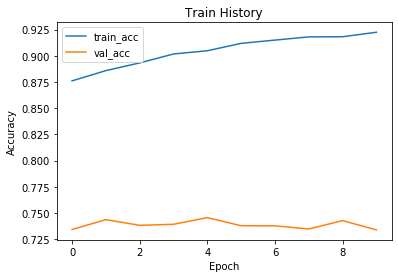

In [28]:
show_train_history('acc','val_acc')


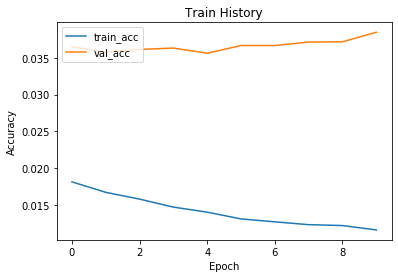

In [29]:
show_train_history('loss','val_loss')